In [117]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [118]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df (2).csv


In [119]:
df = pd.read_csv('df.csv')


In [120]:
df = df.drop(columns='Unnamed: 0')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.rename(columns={'OutboundUtilzation (%)': 'OU'})

In [121]:
df.shape

(46326, 2)

In [122]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46326 entries, 0 to 46325
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  46326 non-null  datetime64[ns]
 1   OU         46326 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 724.0 KB


In [123]:
df.head()

,Timestamp,OU
0,2017-10-10 07:01:36,96.2442
1,2017-10-10 07:21:36,99.1131
2,2017-10-10 07:26:36,97.2892
3,2017-10-10 07:31:36,98.0286
4,2017-10-10 07:36:36,99.5263


In [124]:
df.tail(500)

,Timestamp,OU
45826,2018-03-24 03:13:03,55.044700
45827,2018-03-24 03:18:03,37.446600
45828,2018-03-24 03:23:03,18.495800
45829,2018-03-24 03:28:03,0.702423
45830,2018-03-24 03:33:03,5.865160
...,...,...
46321,2018-03-25 23:43:03,65.842500
46322,2018-03-25 23:48:03,56.881100
46323,2018-03-25 23:53:03,43.635200
46324,2018-03-25 23:58:03,48.941500


In [125]:
df = df.set_index('Timestamp').resample("H").mean()

In [126]:
df

,OU
Timestamp,
2017-10-10 07:00:00,90.397000
2017-10-10 08:00:00,74.493000
2017-10-10 09:00:00,68.930125
2017-10-10 10:00:00,52.874208
2017-10-10 11:00:00,58.498275
...,...
2018-03-25 20:00:00,30.050225
2018-03-25 21:00:00,11.864578
2018-03-25 22:00:00,24.694371


In [127]:
df.isnull().sum()

OU    35
dtype: int64

In [128]:
df[df['OU'].isnull()]

,OU
Timestamp,
2018-01-16 03:00:00,NaN
2018-01-29 23:00:00,NaN
2018-01-31 13:00:00,NaN
2018-01-31 14:00:00,NaN
2018-02-01 00:00:00,NaN
2018-02-01 01:00:00,NaN
2018-02-01 03:00:00,NaN
2018-02-01 06:00:00,NaN
2018-02-01 07:00:00,NaN


In [129]:
df.pad(axis=0, inplace=True)

In [130]:
fig = px.line(df.reset_index(), x='Timestamp', y='OU', title='Outbound Utilization (%)')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count=1, label='1h', step='hour', stepmode='backward'),
            dict(count=2, label='1d', step='day', stepmode='backward'),
            dict(count=3, label='1m', step='month', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [131]:
from fbprophet import Prophet

In [132]:
ou_df = df.reset_index()[['Timestamp','OU']].rename({'Timestamp':'ds','OU':'y'}, axis='columns')

In [133]:
ou_df

,ds,y
0,2017-10-10 07:00:00,90.397000
1,2017-10-10 08:00:00,74.493000
2,2017-10-10 09:00:00,68.930125
3,2017-10-10 10:00:00,52.874208
4,2017-10-10 11:00:00,58.498275
...,...,...
3997,2018-03-25 20:00:00,30.050225
3998,2018-03-25 21:00:00,11.864578
3999,2018-03-25 22:00:00,24.694371
4000,2018-03-25 23:00:00,59.080517


In [134]:
ou_df.shape

(4002, 2)

In [135]:
train = ou_df.iloc[:3593]
test = ou_df.iloc[3593:]

In [136]:
train.shape

(3593, 2)

In [137]:
test.shape

(409, 2)

In [138]:
len(test)/(len(train)+len(test))

0.10219890054972514

In [139]:
train

,ds,y
0,2017-10-10 07:00:00,90.397000
1,2017-10-10 08:00:00,74.493000
2,2017-10-10 09:00:00,68.930125
3,2017-10-10 10:00:00,52.874208
4,2017-10-10 11:00:00,58.498275
...,...,...
3588,2018-03-08 19:00:00,50.744383
3589,2018-03-08 20:00:00,52.693108
3590,2018-03-08 21:00:00,41.824258
3591,2018-03-08 22:00:00,59.331900


In [140]:
test

,ds,y
3593,2018-03-09 00:00:00,74.373292
3594,2018-03-09 01:00:00,90.729017
3595,2018-03-09 02:00:00,75.921055
3596,2018-03-09 03:00:00,71.123233
3597,2018-03-09 04:00:00,36.487458
...,...,...
3997,2018-03-25 20:00:00,30.050225
3998,2018-03-25 21:00:00,11.864578
3999,2018-03-25 22:00:00,24.694371
4000,2018-03-25 23:00:00,59.080517


In [141]:
m = Prophet(changepoint_range = 0.80)

In [142]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [143]:
future = m.make_future_dataframe(periods=409, freq='H')
future

,ds
0,2017-10-10 07:00:00
1,2017-10-10 08:00:00
2,2017-10-10 09:00:00
3,2017-10-10 10:00:00
4,2017-10-10 11:00:00
...,...
3997,2018-03-25 20:00:00
3998,2018-03-25 21:00:00
3999,2018-03-25 22:00:00
4000,2018-03-25 23:00:00


In [144]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3997,2018-03-25 20:00:00,38.860689,15.982678,63.065710
3998,2018-03-25 21:00:00,40.621247,17.981119,64.419114
3999,2018-03-25 22:00:00,47.282608,22.860457,71.199814
4000,2018-03-25 23:00:00,57.893868,34.459649,81.575897
4001,2018-03-26 00:00:00,68.309029,45.256644,91.457580


In [145]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-10 07:00:00,56.801178,53.160172,98.001530,56.801178,56.801178,19.438607,19.438607,19.438607,10.062063,10.062063,10.062063,9.376544,9.376544,9.376544,0.0,0.0,0.0,76.239785
1,2017-10-10 08:00:00,56.805954,51.623433,98.868771,56.805954,56.805954,18.910253,18.910253,18.910253,9.745248,9.745248,9.745248,9.165005,9.165005,9.165005,0.0,0.0,0.0,75.716207
2,2017-10-10 09:00:00,56.810731,49.883892,96.189015,56.810731,56.810731,16.671009,16.671009,16.671009,7.747811,7.747811,7.747811,8.923198,8.923198,8.923198,0.0,0.0,0.0,73.481740
3,2017-10-10 10:00:00,56.815507,48.058826,93.333584,56.815507,56.815507,13.897793,13.897793,13.897793,5.244319,5.244319,5.244319,8.653474,8.653474,8.653474,0.0,0.0,0.0,70.713300
4,2017-10-10 11:00:00,56.820283,45.120313,92.660275,56.820283,56.820283,11.160000,11.160000,11.160000,2.801617,2.801617,2.801617,8.358384,8.358384,8.358384,0.0,0.0,0.0,67.980283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,2018-03-25 20:00:00,55.729722,15.982678,63.065710,55.463729,56.018318,-16.869033,-16.869033,-16.869033,-15.335975,-15.335975,-15.335975,-1.533058,-1.533058,-1.533058,0.0,0.0,0.0,38.860689
3998,2018-03-25 21:00:00,55.722495,17.981119,64.419114,55.456492,56.012477,-15.101248,-15.101248,-15.101248,-14.017052,-14.017052,-14.017052,-1.084197,-1.084197,-1.084197,0.0,0.0,0.0,40.621247
3999,2018-03-25 22:00:00,55.715269,22.860457,71.199814,55.448445,56.006068,-8.432661,-8.432661,-8.432661,-7.813875,-7.813875,-7.813875,-0.618785,-0.618785,-0.618785,0.0,0.0,0.0,47.282608
4000,2018-03-25 23:00:00,55.708042,34.459649,81.575897,55.440398,55.999300,2.185827,2.185827,2.185827,2.324110,2.324110,2.324110,-0.138283,-0.138283,-0.138283,0.0,0.0,0.0,57.893868


In [146]:
results = pd.concat([ou_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

In [147]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2017-10-10 07:00:00,90.397000,76.239785,53.160172,98.001530
2017-10-10 08:00:00,74.493000,75.716207,51.623433,98.868771
2017-10-10 09:00:00,68.930125,73.481740,49.883892,96.189015
2017-10-10 10:00:00,52.874208,70.713300,48.058826,93.333584
2017-10-10 11:00:00,58.498275,67.980283,45.120313,92.660275
...,...,...,...,...
2018-03-25 20:00:00,30.050225,38.860689,15.982678,63.065710
2018-03-25 21:00:00,11.864578,40.621247,17.981119,64.419114
2018-03-25 22:00:00,24.694371,47.282608,22.860457,71.199814


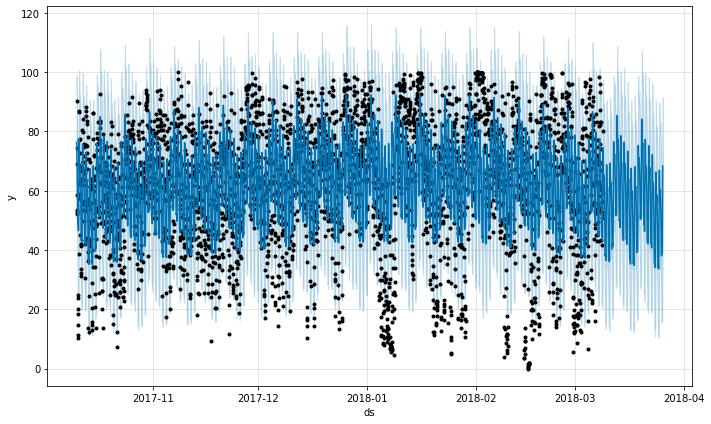

In [148]:
fig1 = m.plot(forecast)
# black dots are actual observation/target y value
# dark blue is y hat value
# light blue is yhat confidence interval

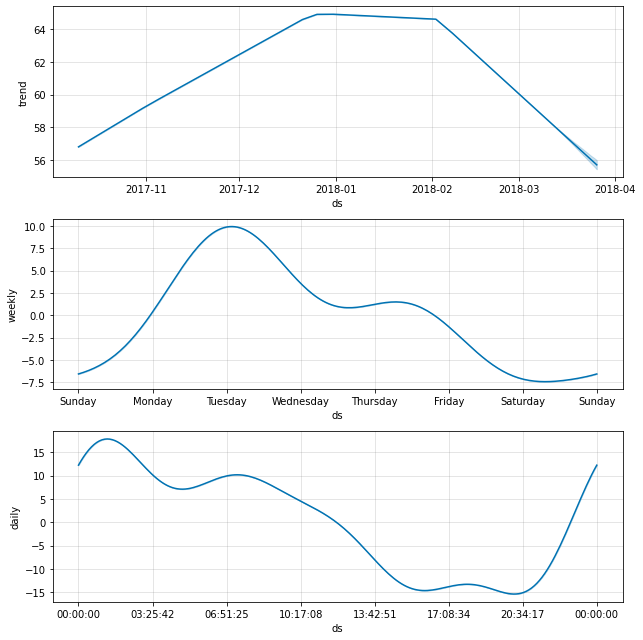

In [149]:
#plot trend and seasonality
comp = m.plot_components(forecast)

In [150]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [151]:
#Outlier part
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2017-10-10 07:00:00,90.397000,76.239785,53.160172,98.001530
2017-10-10 08:00:00,74.493000,75.716207,51.623433,98.868771
2017-10-10 09:00:00,68.930125,73.481740,49.883892,96.189015
2017-10-10 10:00:00,52.874208,70.713300,48.058826,93.333584
2017-10-10 11:00:00,58.498275,67.980283,45.120313,92.660275
...,...,...,...,...
2018-03-25 20:00:00,30.050225,38.860689,15.982678,63.065710
2018-03-25 21:00:00,11.864578,40.621247,17.981119,64.419114
2018-03-25 22:00:00,24.694371,47.282608,22.860457,71.199814


In [152]:
results['error'] = results['y'] - results['yhat']

In [153]:
results

,y,yhat,yhat_lower,yhat_upper,error
ds,,,,,
2017-10-10 07:00:00,90.397000,76.239785,53.160172,98.001530,14.157215
2017-10-10 08:00:00,74.493000,75.716207,51.623433,98.868771,-1.223207
2017-10-10 09:00:00,68.930125,73.481740,49.883892,96.189015,-4.551615
2017-10-10 10:00:00,52.874208,70.713300,48.058826,93.333584,-17.839091
2017-10-10 11:00:00,58.498275,67.980283,45.120313,92.660275,-9.482008
...,...,...,...,...,...
2018-03-25 20:00:00,30.050225,38.860689,15.982678,63.065710,-8.810464
2018-03-25 21:00:00,11.864578,40.621247,17.981119,64.419114,-28.756669
2018-03-25 22:00:00,24.694371,47.282608,22.860457,71.199814,-22.588237


In [154]:
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

In [155]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2017-10-10 07:00:00,90.397000,76.239785,53.160172,98.001530,14.157215,44.841358
2017-10-10 08:00:00,74.493000,75.716207,51.623433,98.868771,-1.223207,47.245338
2017-10-10 09:00:00,68.930125,73.481740,49.883892,96.189015,-4.551615,46.305123
2017-10-10 10:00:00,52.874208,70.713300,48.058826,93.333584,-17.839091,45.274758
2017-10-10 11:00:00,58.498275,67.980283,45.120313,92.660275,-9.482008,47.539962
...,...,...,...,...,...,...
2018-03-25 20:00:00,30.050225,38.860689,15.982678,63.065710,-8.810464,47.083033
2018-03-25 21:00:00,11.864578,40.621247,17.981119,64.419114,-28.756669,46.437995
2018-03-25 22:00:00,24.694371,47.282608,22.860457,71.199814,-22.588237,48.339358


In [156]:
results[results['error'].abs() >  1.5*results['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2018-01-08 01:00:00,6.528102,83.225722,60.644803,107.209461,-76.697620,46.564658
2018-01-08 02:00:00,9.023074,82.903854,58.453800,104.621442,-73.880780,46.167642
2018-02-16 00:00:00,1.699262,73.259259,50.723405,97.659824,-71.559996,46.936419


In [157]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) > x['uncertainty']) else 'No', axis = 1)

In [158]:
results[results['anomaly'] == 'Yes'] # double checking to see if only 3 are anomalies

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2017-11-14 05:00:00,25.346100,77.539075,54.485043,100.628646,-52.192975,46.143603,Yes
2018-01-04 10:00:00,23.101925,71.517909,49.692687,94.063958,-48.415984,44.371271,Yes
2018-01-05 01:00:00,29.777458,80.802470,56.199404,103.173783,-51.025012,46.974379,Yes
2018-01-05 10:00:00,13.035659,65.704492,40.892768,88.882676,-52.668833,47.989908,Yes
2018-01-05 11:00:00,10.998828,62.973510,39.484149,86.456566,-51.974681,46.972417,Yes
...,...,...,...,...,...,...,...
2018-03-22 14:00:00,0.641590,47.870174,25.001891,69.988852,-47.228583,44.986960,Yes
2018-03-23 09:00:00,11.635725,59.795142,37.173364,84.104094,-48.159417,46.930729,Yes
2018-03-23 11:00:00,4.195794,54.249120,31.679516,77.231501,-50.053325,45.551985,Yes


In [159]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='Outbound Utilization (%)')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1h', step='hour', stepmode='backward'),
            dict(count=2, label='1d', step='day', stepmode='backward'),
            dict(count=3, label='1m', step='month', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [160]:
y_mean = results['y'].mean()
y_mean

61.756622607260155

In [161]:
new_df = results.reset_index()

In [162]:
filt = new_df['anomaly'] == 'Yes'
for idx in new_df[filt].index:
    new_df.iloc[idx,1] = y_mean

In [163]:
new_df[new_df['anomaly'] == 'Yes']

,ds,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
838,2017-11-14 05:00:00,61.756623,77.539075,54.485043,100.628646,-52.192975,46.143603,Yes
2067,2018-01-04 10:00:00,61.756623,71.517909,49.692687,94.063958,-48.415984,44.371271,Yes
2082,2018-01-05 01:00:00,61.756623,80.802470,56.199404,103.173783,-51.025012,46.974379,Yes
2091,2018-01-05 10:00:00,61.756623,65.704492,40.892768,88.882676,-52.668833,47.989908,Yes
2092,2018-01-05 11:00:00,61.756623,62.973510,39.484149,86.456566,-51.974681,46.972417,Yes
...,...,...,...,...,...,...,...,...
3919,2018-03-22 14:00:00,61.756623,47.870174,25.001891,69.988852,-47.228583,44.986960,Yes
3938,2018-03-23 09:00:00,61.756623,59.795142,37.173364,84.104094,-48.159417,46.930729,Yes
3940,2018-03-23 11:00:00,61.756623,54.249120,31.679516,77.231501,-50.053325,45.551985,Yes
3941,2018-03-23 12:00:00,61.756623,50.967062,26.694590,72.421297,-50.933943,45.726707,Yes


In [164]:
clean_df = new_df[['ds','y']]

In [165]:
train2 = clean_df.iloc[:3545]
test2 = clean_df.iloc[3545:]

In [166]:
model = Prophet(interval_width=0.95)

In [167]:
model.fit(train2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [168]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [169]:
future = model.make_future_dataframe(periods=457 , freq='H')
future

,ds
0,2017-10-10 07:00:00
1,2017-10-10 08:00:00
2,2017-10-10 09:00:00
3,2017-10-10 10:00:00
4,2017-10-10 11:00:00
...,...
3997,2018-03-25 20:00:00
3998,2018-03-25 21:00:00
3999,2018-03-25 22:00:00
4000,2018-03-25 23:00:00


In [170]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-10 07:00:00,75.575946,44.960598,105.795611
1,2017-10-10 08:00:00,75.071367,41.481732,107.727331
2,2017-10-10 09:00:00,73.334546,39.212279,106.139671
3,2017-10-10 10:00:00,71.266780,37.401899,102.923281
4,2017-10-10 11:00:00,68.946915,33.023108,101.725667
...,...,...,...,...
3997,2018-03-25 20:00:00,38.105579,6.405895,70.401535
3998,2018-03-25 21:00:00,40.262913,7.819105,72.138166
3999,2018-03-25 22:00:00,47.565961,16.238676,79.515452
4000,2018-03-25 23:00:00,58.596383,26.151531,92.092035


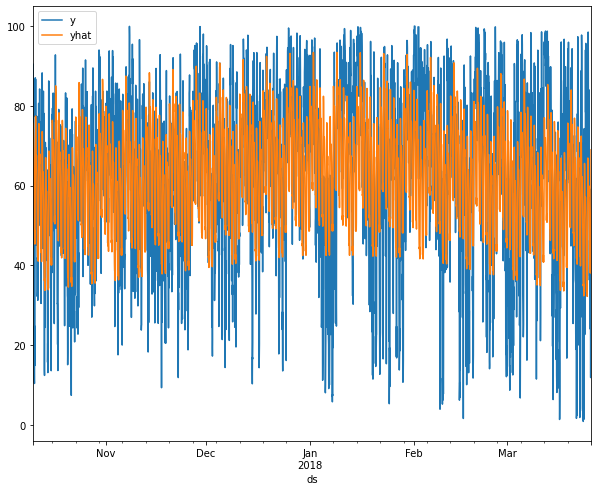

In [171]:
pd.concat([clean_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [172]:
pd.concat([clean_df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1)

,y,yhat
ds,,
2017-10-10 07:00:00,90.397000,75.575946
2017-10-10 08:00:00,74.493000,75.071367
2017-10-10 09:00:00,68.930125,73.334546
2017-10-10 10:00:00,52.874208,71.266780
2017-10-10 11:00:00,58.498275,68.946915
...,...,...
2018-03-25 20:00:00,30.050225,38.105579
2018-03-25 21:00:00,11.864578,40.262913
2018-03-25 22:00:00,24.694371,47.565961


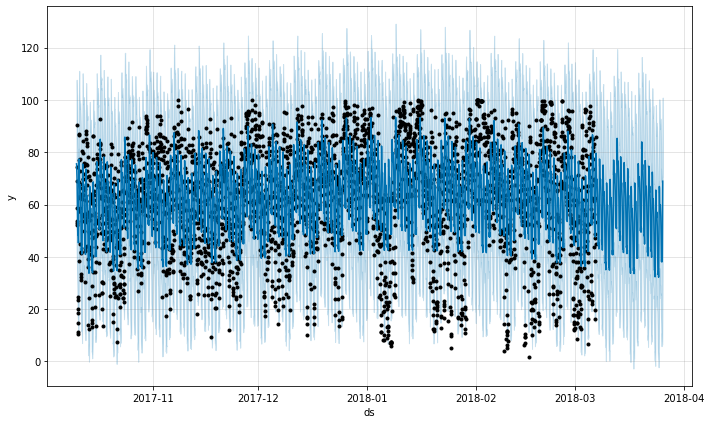

In [173]:
fig5 = model.plot(forecast)

In [174]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig7 = plot_plotly(model, forecast)  # This returns a plotly Figure
py.iplot(fig7)